In [32]:
import pandas as pd

# load cleaned data
reviews = pd.read_csv('../Data/clean_data.csv')

reviews.head()

,abbey,able,absence,absolutely,absolutly,ac,accent,accept,acceptable,accepted,...,yoga,yoghurt,yogurt,yorkshire,young,zamero,zero,zoo,zoom,Reviewer_Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
features = reviews.iloc[:,:reviews.shape[1]-1]
features.head()

,abbey,able,absence,absolutely,absolutly,ac,accent,accept,acceptable,accepted,...,yo,yoga,yoghurt,yogurt,yorkshire,young,zamero,zero,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
labels = reviews.iloc[:, reviews.shape[1]-1]
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: Reviewer_Score, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features.values, labels.values, test_size=0.33, random_state=47)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import numpy as np

#fit model on new matrix
#obtain metrics for model
log_model = LogisticRegression()
log_model.fit(features_train, labels_train)
pred = log_model.predict(features_test)
print('number of 0s is ' + str(labels.shape[0] - np.sum(labels.values)))
metrics.accuracy_score(labels_test, pred)

number of 0s is 354


0.7151515151515152

In [41]:
log_model.coef_.shape

(1, 3024)

In [67]:
import pandas as pd

words = reviews.columns[: reviews.shape[1]-1]
coef = log_model.coef_.transpose()
coef = [abs(x)[0] for x in coef]

word_importance = pd.DataFrame()
word_importance['word'] = words
word_importance['coef'] = coef

word_importance = word_importance.sort_values(by=['coef'], ascending = False)

word_importance.head()

,word,coef
1967,poor,1.443070
1551,lovely,1.180005
938,excellent,1.133682
1767,noisy,1.055558
2512,star,1.030789


In [84]:
words_wanted = 10

most_important = word_importance.iloc[:words_wanted].values
X = [x[0] for x in most_important]
Y = [x[1] for x in most_important]



<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

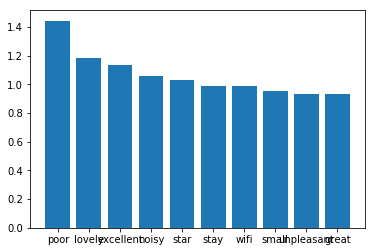

In [85]:
import matplotlib.pyplot as plt

plt.bar(X,Y)